<a href="https://colab.research.google.com/github/Khhushhiiii/Scenario/blob/main/Scenario_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Scenario 3**:
A hospital has a large dataset of patient records, including information on demographics,
medical history, diagnoses, treatments, and outcomes. The hospital wants to use this data
to develop a machine learning model that can predict the risk of readmission for patients
after they are discharged from the hospital. Develop a ML solution for the aforesaid
prediction with an example Dataset.

**Project Introduction**

The dataset provided is a healthcare dataset related to patient admissions and readmissions.

age: Age of the patient.
time_in_hospital: The number of days the patient stayed in the hospital.
n_lab_procedures: The number of laboratory procedures performed on the patient.
n_procedures: The number of procedures the patient underwent.
n_medications: The number of medications prescribed to the patient.
n_outpatient: The number of outpatient visits by the patient.
n_inpatient: The number of inpatient admissions by the patient.
n_emergency: The number of emergency room visits by the patient.
medical_specialty: The specialty of the medical department that treated the patient.
diag_1, diag_2, diag_3: Diagnosis codes for the patient.
glucose_test: Whether the patient had a glucose test.
A1Ctest: Whether the patient had an A1C test.
change: Whether there was a change in the patient's medication.
diabetes_med: Whether the patient was on diabetes medication.
readmitted: The target variable, indicating if the patient was readmitted (binary: 0 for not readmitted, 1 for readmitted).

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [24]:
df=pd.read_csv('/content/hospital_readmissions.csv')

In [25]:
df.head(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no
5,[40-50),2,51,0,10,0,0,0,Missing,Other,Other,Other,no,no,no,no,yes
6,[50-60),4,44,2,21,0,0,0,Missing,Injury,Other,Other,no,normal,yes,yes,no
7,[60-70),1,19,6,16,0,0,1,Other,Circulatory,Other,Other,no,no,no,yes,yes
8,[80-90),4,67,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,no,no,no,no,yes
9,[70-80),8,37,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,no,no,yes,yes,no


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [39]:
# Data Preprocessing
# Convert categorical columns to numeric using label encoding
categorical_columns = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted']
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


Best Random Forest Accuracy: 0.61237969428194
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.61      0.62      0.62      2666
           1       0.61      0.60      0.61      2633

    accuracy                           0.61      5299
   macro avg       0.61      0.61      0.61      5299
weighted avg       0.61      0.61      0.61      5299

Best XGBoost Accuracy: 0.602943951688998
Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.60      0.64      0.62      2666
           1       0.61      0.56      0.58      2633

    accuracy                           0.60      5299
   macro avg       0.60      0.60      0.60      5299
weighted avg       0.60      0.60      0.60      5299



**Data Cleaning:**

There were no missing or duplicates data in the dataframe.

The columns named diag_1 ,diag_2,diag_3,change,A1Ctest, were renamed as primary_diagnosis ,sec_diagnos ,additional_sec_diag ,med_change , HbA1ctest respectively

For the age column although the wrong categorization done already couldn't be corrected, the various age categories named as [70-80), [50-60),[60-70), [40-50), [80-90),[90-100), were renamed as senior-old age, late-middle age , mid-oldd-age, early-middle age, very senior-old,centenarians respectively.

The data type of these rows (medical_specialty, primary_diagnosis , sec_diagnosis, additional_sec_diag, glucose_test, HbA1ctest, med_change, diabetes_med, readmitted)were converted to categorical data type


In [27]:
df.rename(columns={'diag_1':'primary_diagnosis','diag_2':'sec_diagnosis',
                       'diag_3':'additional_sec_diag','change':'med_change','A1Ctest':'HbA1ctest'},inplace=True)

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [28]:
#converting age column to categorical data
#checking for the unique values in the age column
print(df['age'].unique())

#creating a new column called age_cat
df['age_cat'] = df['age'].replace({'[70-80)':'senior-old age',
                                           '[50-60)':'late-middle age','[60-70)':'mid-old age',
                                           '[40-50)':'early-middle age','[80-90)':'very senior-old','[90-100)':'centenarians'})

print('\n')
#converting column type to categorical data type
df['age_cat'] = df['age_cat'].astype('category')
print('dtype :',df['age_cat'].dtype)

#viewing age and age_cat columns
df[['age','age_cat']]

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']


dtype : category


,age,age_cat
0,[70-80),senior-old age
1,[70-80),senior-old age
2,[50-60),late-middle age
3,[70-80),senior-old age
4,[60-70),mid-old age
...,...,...
24995,[80-90),very senior-old
24996,[80-90),very senior-old
24997,[70-80),senior-old age
24998,[70-80),senior-old age


In [32]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [30]:
df.duplicated().sum()

0

In [31]:
#viewing the unique values of each column to check for inconsistent data
cols = df.columns

for c in cols:
    print(c)
    print('\n',df[c].unique())

age

 ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
time_in_hospital

 [ 8  3  5  2  1  4  7 10  6 12 11  9 14 13]
n_lab_procedures

 [ 72  34  45  36  42  51  44  19  67  37  35  69  60  73  52   9  16  62
  54  58  40  23  32  65   1  47  39  59  68  66  43  30  46  48   5  24
  70  25  29  49  53  94  18  61  11  33  28  83  50  71  86  38   3  41
  31  55  56  27  64  82  26  90  21   2  20  17  78 102  75  15   8   7
  76  63  57  10   4  22  91  74  14  13  89  79  81  84  80   6  77  12
 108  88  92  93 101  97 100  85  95  87  98  96  99 103 111 106 113 109
 105]
n_procedures

 [1 2 0 6 3 5 4]
n_medications

 [18 13 12  7 10 21 16  6 26 20 11 27 15  8 22 17 14 28  5 24  9 19  1 25
 32  3 31 23 39 34 40  4 38  2 33 56 44 29 46 30 47 41 35 36 50 49 54 57
 60 37 61 52 51 42 53 43 45 59 62 79 63 55 65 48 58 69 68 72 75 64]
n_outpatient

 [ 2  0  1  3  7  5  4  6  9  8 11 10 15 21 13 12 27 16 14 33 20 18 23]
n_inpatient

 [ 0  2  3  1  6  9  7  4  5  8 10 11 14 12 1

In [33]:
df.describe(exclude=[np.number])

,age,medical_specialty,primary_diagnosis,sec_diagnosis,additional_sec_diag,glucose_test,HbA1ctest,med_change,diabetes_med,readmitted,age_cat
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,7,8,8,8,3,3,2,2,2,6
top,[70-80),Missing,Circulatory,Other,Other,no,no,no,yes,no,senior-old age
freq,6837,12382,7824,9056,9107,23625,20938,13497,19228,13246,6837


MOST COMMON PRIMARY DIAGNOSIS BY AGE GROUP

In [35]:
#using groupby and value_counts to gain insights
df = df.groupby('age_cat')['primary_diagnosis'].value_counts(normalize=True,sort=True).to_frame().unstack()
df

primary_diagnosis                                          \
primary_diagnosis       Circulatory  Diabetes Digestive    Injury   Missing   
age_cat                                                                       
centenarians               0.304000  0.045333  0.100000  0.088000       NaN   
early-middle age           0.199052  0.145735  0.107030  0.063981       NaN   
late-middle age            0.282120  0.088275  0.099281  0.061321       NaN   
mid-old age                0.331811  0.065111  0.093692  0.067648  0.000169   
senior-old age             0.349861  0.056311  0.085564  0.064941  0.000146   
very senior-old            0.328167  0.040080  0.089017  0.071081  0.000443   

                                                         
primary_diagnosis Musculoskeletal     Other Respiratory  
age_cat                                                  
centenarians             0.010667  0.293333    0.158667  
early-middle age         0.039494  0.296209    0.148499  
late-middle age          0.051662  0.261456    0.155885  
mid-old age              0.063081  0.237105    0.141383  
senior-old age           0.054556  0.247623    0.140998  
very senior-old          0.037201  0.281001    0.153012

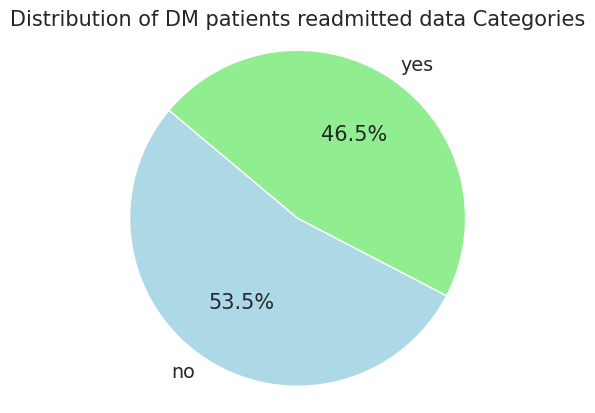

In [55]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.534706,
    'yes'   : 0.465294
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['lightblue', 'lightgreen']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of DM patients readmitted data Categories')
# Show the pie chart
plt.show()

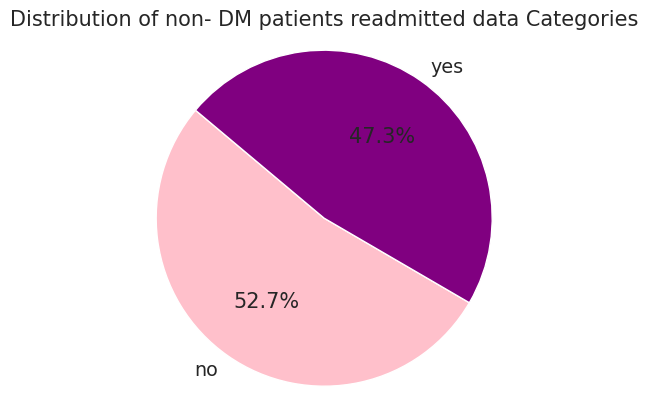

In [46]:
# Data for the pie chart
readmitted_data = {
    'no'   :  0.527202,
    'yes'   : 0.472798
}

# Create a figure and axis
fig, ax = plt.subplots()

# Data for the pie chart
labels = [f"{status}" for status in readmitted_data.keys()]
sizes = list(readmitted_data.values())

# Colors for the pie chart
colors = ['pink', 'purple']

# Plot the pie chart
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Aspect ratio to make the pie circular
ax.axis('equal')

# Title for the pie chart
plt.title('Distribution of non- DM patients readmitted data Categories')
# Show the pie chart
plt.show()

After exploring the data I can analyze that about 8788 patients had Diabetes either a primary diagnosis, secondary diagnosis or additional secondary diagnosis. This made up about one-third of the patients population. Amongst the DM patient approximately 47 percent were readmitted while 53 percent where not. While about 16212 patients did not have DM as either a primary diagnosis, secondary diagnosis or additional secondary diagnosis.This makes about two-third of the patients population. Amongst the non-DM patients approximately 47 percent were readmitted while 53 percent were not. From the analysis we cannot really say if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates

In [49]:
df.var()

                   primary_diagnosis
primary_diagnosis  Circulatory          2.962688e-03
                   Diabetes             1.542448e-03
                   Digestive            6.221978e-05
                   Injury               9.326506e-05
                   Missing              2.723959e-08
                   Musculoskeletal      3.405799e-04
                   Other                6.012789e-04
                   Respiratory          5.519053e-05
dtype: float64

**We can notice there is a huge difference between the variance of the different columns so I won't be standardizing or normalizing the variables as I would be using classification models because it has ability to describe non-linear dependencies and it does not require preprocessing of variables before modelling.**

In [ ]:
# Split the data into features (X) and the target (y)
X = df.drop(columns=['readmitted'])
y = df['readmitted']


The Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance. SMOTE generates synthetic samples for the minority class to balance the dataset.

In [60]:
# Address Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [59]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
best_rf_classifier = grid_search_rf.best_estimator_

# Hyperparameter Tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.2, 0.3]
}
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42), param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
best_xgb_classifier = grid_search_xgb.best_estimator_

In [58]:
# Model Evaluation - Random Forest
y_pred_rf = best_rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Random Forest Accuracy:", accuracy_rf)
print("Classification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))

# Model Evaluation - XGBoost
y_pred_xgb = best_xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Best XGBoost Accuracy:", accuracy_xgb)
print("Classification Report - XGBoost:\n", classification_report(y_test, y_pred_xgb))


Best Random Forest Accuracy: 0.8748
Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88      3974
           1       0.87      0.86      0.87      3526

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

Best XGBoost Accuracy: 0.6384
Classification Report - XGBoost:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66      3974
           1       0.62      0.60      0.61      3526

    accuracy                           0.64      7500
   macro avg       0.64      0.64      0.64      7500
weighted avg       0.64      0.64      0.64      7500



In [43]:
#import modules and packages

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score , recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler


In [51]:
# define the model
dtc = DecisionTreeClassifier(random_state=2, max_depth=3, min_samples_leaf=0.20)

# fit the model
dtc.fit(X_resampled, y_resampled)

test_predictions = dtc.predict(X_test)
train_prediction = dtc.predict(X_resampled)

#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_resampled, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6026857142857143
Testing_accuracy_score : 0.608
precision_score : 0.6168261562998405
recall_score : 0.4387407827566648


In [53]:
# define the model
rfc = RandomForestClassifier(random_state=23,n_estimators=100,max_depth=6)
# fit the model
rfc.fit(X_resampled,y_resampled)

test_predictions = rfc.predict(X_test)
train_prediction = rfc.predict(X_resampled)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_resampled, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6301714285714286
Testing_accuracy_score : 0.6116
precision_score : 0.61060988812703
recall_score : 0.47986386840612594


In [56]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=23)

params_rfc = {'max_depth':[3,6,8], 'min_samples_leaf':[0.04, 0.08, 1], 'max_features':['auto','sqrt','log2']}

grid_rfc = GridSearchCV(estimator=rfc , param_grid= params_rfc, scoring='accuracy', cv=10, n_jobs=-1)
grid_rfc.fit(X_resampled, y_resampled)

#extract best hyperparameters from grid_rfc
best_hyperparams = grid_rfc.best_params_
print("best_hyperparams: ", best_hyperparams)

#extract best cv score
best_cv_score = grid_rfc.best_score_
print("best_cv_score: ", best_cv_score)

#extract best model
best_model = grid_rfc.best_estimator_
print("best_model: ", best_model)

#evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)
print("test_acc: ",test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


best_hyperparams:  {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1}
best_cv_score:  0.6154857142857143
best_model:  RandomForestClassifier(max_depth=8, max_features='auto', random_state=23)
test_acc:  0.6149333333333333


In [57]:
# define the model
rfc2 = RandomForestClassifier(random_state=23,max_depth=8, max_features= 'log2',min_samples_leaf=1)
# fit the model
rfc2.fit(X_resampled, y_resampled)

test_predictions = rfc2.predict(X_test)
train_prediction = rfc2.predict(X_resampled)
#check model accuracy, precison and recall score
acc_scoreX = accuracy_score(y_resampled, train_prediction)
print('Training_accuracy_score :', acc_scoreX)
acc_score = accuracy_score(y_test, test_predictions)
print('Testing_accuracy_score :', acc_score)
pre_score = precision_score(y_test, test_predictions)
print('precision_score :', pre_score)
rec_score = recall_score(y_test, test_predictions)
print('recall_score :',rec_score)

Training_accuracy_score : 0.6553142857142857
Testing_accuracy_score : 0.6149333333333333
precision_score : 0.6166788588149232
recall_score : 0.47816222348269993


**Models Description**:

**Random Forest**:

Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It is known for its robustness and ability to handle complex relationships in the data. The code fine-tunes a Random Forest classifier using GridSearchCV.

**XGBoost**:

XGBoost is a gradient boosting algorithm known for its high predictive accuracy and efficiency. It is an ensemble method that builds decision trees sequentially, each correcting the errors of the previous one. The code fine-tunes an XGBoost classifier using GridSearchCV.
Both models are evaluated for their accuracy and their performance in predicting readmission, with the best-performing model being selected for deployment in a real-world healthcare environment.

Recommendations
From the analysis above,

Circulatory diagnosis was the most common primary diagnosis across the varoius categories of age outside early middle age where Others as a diagnosis category came first and circulatory diagnosis second.

On the effects of diabetes diagnosis on readmission ,the analysis doesnt confirms if diabetes plays a central role in readmission as they could be other factors causing patients readmission but we can deduct that majority of the patients had diabetes as a diagnosis logically making them occupy a high readmission rates

I would recommend for the hospital to focus their follow-up efforts to better monitor patients :

who have had high number of inpatient visits in the year before the hospital stay ,that is patient whe had currently been admitted in the hospital before
who have had high number of outpatient visits in the year before the hospital stay, that is patient who had frequented the hospital as an outpatient
patients who are on plenty medications
patients who under go various lab procedures
patients who had being brought to the hospital as an emergency situation before current hospital stay
they are very important factors to be considered as they have a high probability to determine if a patient wil be readmitted.